# Boundary Conditions for Finite Difference Analysis
### Cole Lord-May & Russell Bate

### The purpose of this Notebook is to familiarize the reader with the implementation of different boundary conditions in finite element analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

# Example: The Heat Equation

$\Large{\frac{\partial U}{\partial t} - \kappa \nabla^2U = 0}$

This is a statement of conservation of energy. It can be reduced to the one dimensional equation

$\Large{\frac{\partial U}{\partial t} = \kappa \frac{\partial^2 U}{\partial x^2}}$

## Dirichlet Boundary Conditions:
### Simplest case is to set the boundary conditions to constants for all time!
$ \Large{ U(0,t) = \alpha, } $   $ \Large{ U(L,t) = \beta , U(x,0) = 0} $  

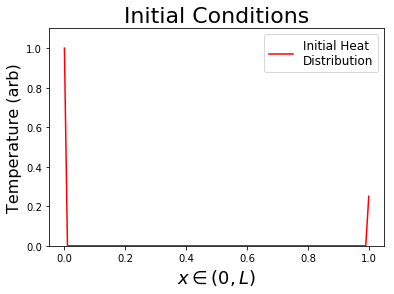


###############################
## Heat Equation FD Analysis ##
## Dirichlet Boundary #########
###############################

dx               = 0.01
dt               = 1e-05
time steps       = 15000
alpha            = 1
dt/dx**2         = 0.10000000000000001
alpha*dt/dx**2   = 0.10000000000000001




In [2]:
''' This code uses forward difference in time, 
and centered difference in space (because it is easy to understand!)'''

#########################################
## SET THE GRID AND INITIAL CONDITIONS ##
#########################################

## Setting grid size
N = 101
n = N-2
## Outer grid with boundary conditions which we don't touch (for now)
N_range = np.arange(0,N,1)
## Inner grid where the changes occurr
n_range = np.arange(1,n+1,1)

## Initialize the 1-D Grid
x = np.linspace(0,1,N,endpoint=True)


## SET PARAMETERS HERE ##
#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

dx = x[1] - x[0]
dt = 1e-5
kappa = 1 # heat conduction coefficient
alpha = 1 # LEFT initial condition
beta = .25 # RIGHT initial condition
time_steps = 15000
time = np.arange(0,time_steps*dt, dt)
coeff = kappa*dt/dx**2

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


## Initial conditions
u_xt_init = np.zeros( np.shape(x) )
u_xt_init[x==0] = 1 # \alpha value
u_xt_init[x==1] = .25 # \beta value

## PLOT INITIAL CONDITIONS ##
plt.plot(x, u_xt_init, color='red', label='Initial Heat\nDistribution')
plt.title('Initial Conditions', fontsize=22)
plt.xlim(-.05,1.05)
plt.ylim(0,1.1)
plt.xlabel('$x \in (0,L)$', fontsize=18)
plt.ylabel('Temperature (arb)', fontsize=16)
plt.legend(loc=1, prop={'size':12})
plt.show()

# Initialize data storage grid
U_XT = np.empty( (time_steps, N+1) )


####################################
## DISPLAY ALL INITIAL PARAMETERS ##
####################################
print()
print('###############################')
print('## Heat Equation FD Analysis ##')
print('## Dirichlet Boundary #########')
print('###############################')
print()
print('dx               = '+repr(dx))
print('dt               = '+repr(dt))
print('time steps       = '+str(time_steps))
print('alpha            = '+repr(alpha))
print('dt/dx**2         = '+repr(dt/dx**2))
print('alpha*dt/dx**2   = '+repr(alpha*dt/dx**2))
print(); print()


##########################################################
## MAIN CODE BLOCK FOR 1-D CONSTANT BOUNDARY CONDITIONS ##
##########################################################

## EXECUTE MARCHING 
for i in range(time_steps):

	if i == 0:
		u_xt_march, u_xt = [u_xt_init]*2

	else:
		for j in n_range:
			''' Only sweeps through the inner grid n_range,
			leaving the boundaries intact! '''
			u_xt_march[j] = ( coeff*( u_xt[j+1] - 2*u_xt[j] +
							    u_xt[j-1] ) + u_xt[j] )
			# if j == max(n_range):
			# 	print(i)

    # Save data to grid with time information and 
	U_XT[i, 0] = time[i]
	U_XT[i, 1:N+1] = u_xt_march
    # Re-name u_xt such that the future step is the new current step!
	u_xt = u_xt_march

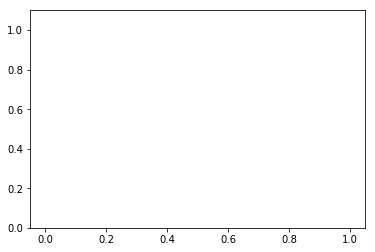

In [3]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(-.05, 1.05)
ax.set_ylim(0, 1.1)

line, = ax.plot([], [], lw=2, color='red')  

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [5]:
frame_divisions = 25

condensed_frames = np.empty((int(time_steps/frame_divisions),N))

m = 0
for i in range(time_steps):
    if i % frame_divisions == 0:
        condensed_frames[m] = U_XT[i,1:N+1]
        m += 1
    
def heat_equation(i):
    heat_info = condensed_frames[i,:]
    line.set_data(x, heat_info)
    return (line,)

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, heat_equation, init_func=init,
                frames=int(time_steps/frame_divisions), interval=40, blit=False)

In [7]:
HTML(anim.to_html5_video())

## Neumann Boundary Conditions
### What if we have a physical system where the temperature is not fixed on the sides, but we set the conditions such that no heat flows out of the system?
### Set first derivative to zero at the boundaries!

$ \Large{ \frac{\partial U(0,t)}{\partial t}  = 0 } $

$ \Large{ \frac{\partial U(L,t)}{\partial t} = 0 } $

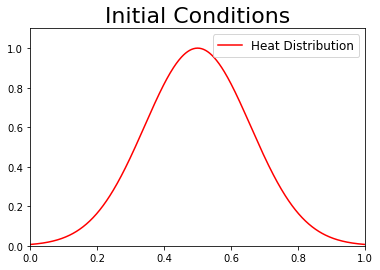


#################################
## Heat Equation FD Analysis ####
## Neumann Boundary Conditions ##
#################################

dx               = 0.002
dt               = 2e-06
alpha            = 1
dt/dx**2         = 0.5
alpha*dt/dx**2   = 0.5
insulation constant = 0


Finished...


In [8]:
''' This code uses forward difference in time, 
and centered difference in space with Neumann boundary conditions, set to 0. '''

#########################################
## SET THE GRID AND INITIAL CONDITIONS ##
#########################################

## Setting grid size
N = 501
n = N-2
## Outer grid with boundary conditions which we don't touch (for now)
N_range = np.arange(0,N,1)
## Inner grid where the changes occurr
n_range = np.arange(1,n+1,1)

## Initialize the 1-D Grid
x = np.linspace(0,1,N,endpoint=True)

## Initial conditions
u_xt_init = np.exp(-(x-.5)**2/.05)

## SET PARAMETERS HERE ##
#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

dx = x[1] - x[0]
dt = 2e-6
kappa = 1 # heat conduction coefficient
time_steps = 20000
time = np.arange(0,time_steps*dt, dt)
coeff = kappa*dt/dx**2
gamma = 0 # Set gamma to .75

#\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\


## PLOT INITIAL CONDITIONS ##
plt.title('Initial Conditions', fontsize=22)
plt.plot(x, u_xt_init, color='red', label='Heat Distribution')
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.legend(loc=1, prop={'size':12})
plt.show()

# Initialize data storage grid
U_XT_2 = np.empty( (time_steps, N+1) )

####################################
## DISPLAY ALL INITIAL PARAMETERS ##
####################################
print()
print('#################################')
print('## Heat Equation FD Analysis ####')
print('## Neumann Boundary Conditions ##')
print('#################################')
print()
print('dx               = '+repr(dx))
print('dt               = '+repr(dt))
print('alpha            = '+repr(alpha))
print('dt/dx**2         = '+repr(dt/dx**2))
print('alpha*dt/dx**2   = '+repr(alpha*dt/dx**2))
print('insulation constant = '+repr(gamma))
print(); print()


#####################################################
## MAIN CODE BLOCK FOR NEUMANN BOUNDARY CONDITIONS ##
#####################################################

for i in range(time_steps):

	if i == 0:
		u_xt_march, u_xt = [u_xt_init]*2

	else:
		# Here we put the Von Neumann Boundary Conditions
		u_xt[0] = u_xt[2] - 2*gamma*dx
		u_xt[N-1] = u_xt[N-2]

		for j in n_range:
			''' Only sweeps through the inner grid n_range,
			leaving the boundaries intact! '''
			u_xt_march[j] = ( coeff*( u_xt[j+1] - 2*u_xt[j] +
							    u_xt[j-1] ) + u_xt[j] )

	U_XT_2[i, 0] = time[i]
	U_XT_2[i, 1:N+1] = u_xt_march
    # Re-name u_xt such that the future step is the new current step!
	u_xt = u_xt_march

print('Finished...')

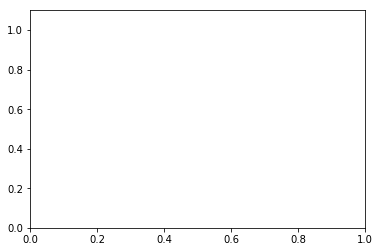

In [9]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)

line, = ax.plot([], [], lw=2, color='red')  

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [10]:
## Just take the first 1/4 of the data for the video
# shortened_time_steps = 2500
# shortened_data = U_XT[0:shortened_time_steps,:]

frame_divisions = 25
condensed_frames = np.empty((int(time_steps/frame_divisions),N))

m = 0
for i in range(time_steps):
    if i % frame_divisions == 0:
        condensed_frames[m] = U_XT_2[i,1:N+1]
        m += 1
    
def heat_equation_neumann(i):
    heat_info = condensed_frames[i,:]
    line.set_data(x, heat_info)
    return (line,)

In [11]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, heat_equation_neumann, init_func=init,
                frames=int(time_steps/frame_divisions), interval=20, blit=False)

In [12]:
HTML(anim.to_html5_video())

# How do boundary conditions change in the 2-D case?


#################################
## Heat Equation FD Analysis ####
## Two Dimensional Case #########
## Neumann Boundary Conditions ##
#################################

dx               = 0.0005
dy               = 0.0005
dt               = 0.001
kappa*dt/dx**2   = 6.000000000000001e-05
kappa*dt/dy**2   = 6.000000000000001e-05




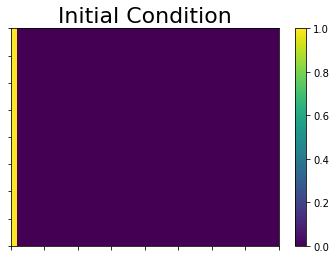

Finished..


In [31]:
dt = 0.001
dx = 0.0005
dy = 0.0005
k = 6*10**(-5)
y_max = 0.02
t_max = 1
T0 = 1


####################################
## DISPLAY ALL INITIAL PARAMETERS ##
####################################
print()
print('#################################')
print('## Heat Equation FD Analysis ####')
print('## Two Dimensional Case #########')
print('## Neumann Boundary Conditions ##')
print('#################################')
print()
print('dx               = '+repr(dx))
print('dy               = '+repr(dy))
print('dt               = '+repr(dt))
print('kappa*dt/dx**2   = '+repr(k))
print('kappa*dt/dy**2   = '+repr(k))
print(); print()


def FTCS2D(dt,dx,dy,t_max,y_max,k,T0):
    sy = k*dt/dy**2
    sx = k*dt/dx**2
    x = np.arange(0,y_max+dx,dx)
    y = np.arange(0,y_max+dy,dy) 
    t = np.arange(0,t_max+dt,dt)
    r = len(t)
    cx = len(x)
    cy = len(y)
    
    T = np.zeros([r,cx,cy])
        
    T[:,:,0] = T0
    #T[:,-1] = 0.5
    for n in range(0,r-1):
        for i in range(1,cx-1):
            for j in range(1, cy-1):
                T[n+1,i,j] = T[n,i,j] + sx*(T[n,i-1,j] - 2*T[n,i,j] + T[n,i+1,j]) + \
                sy*(T[n,i,j-1] - 2*T[n,i,j] + T[n,i,j+1])  # as before
             
    return y,T,r


y,T,r = FTCS2D(dt,dx,dy,t_max,y_max,k,T0)


################################
## Display Initial Conditions ##
################################

plt.pcolormesh(T[0])
plt.title('Initial Condition', fontsize=22)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.xlim(0,40)
plt.ylim(0,40)
plt.colorbar()
plt.show()

print('Finished..')

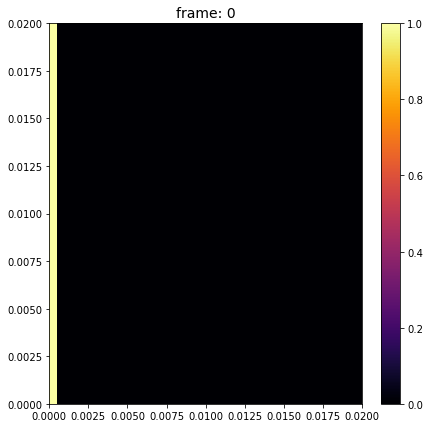

In [32]:
x, y = np.arange(0,y_max+dx,dx), np.arange(0,y_max+dy,dy) 
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
cax = ax.pcolormesh(X, Y, T[0],
                   vmin=0, vmax=1, cmap=cm.inferno)
fig.colorbar(cax)
fig.set_size_inches(7,7)
ax.set_title('Initial Condition', fontsize=20)

def animate_colormesh(i, T, cax, ax):
    cax.set_array( np.ravel( T[i,:-1, :-1]) )
    ax.set_title('frame: '+'{:}'.format(i), fontsize=14)
    return cax,

anim = animation.FuncAnimation(fig, animate_colormesh, frames=1000, fargs=(T, cax, ax),
                               interval=40, blit=False)

In [33]:
HTML(anim.to_html5_video())